In [1]:
import module.DataPreprocessing as data_pp
import platform

# 클래스 수정 시 import 리로드
import importlib
importlib.reload(data_pp)

current_os = platform.system()
sep = "\\" if current_os == "Windows" else "/"

# 파일경로, 라벨 정보 추출
#root_folder = f"..{sep}01.Data{sep}01.fish"
root_folder = f".{sep}Fish_Dataset"     #local house
dp = data_pp.DataPreprocessing()
file_path, label = dp.get_file_path(root_folder, "png")
len(file_path), len(label)

(9281, 9281)

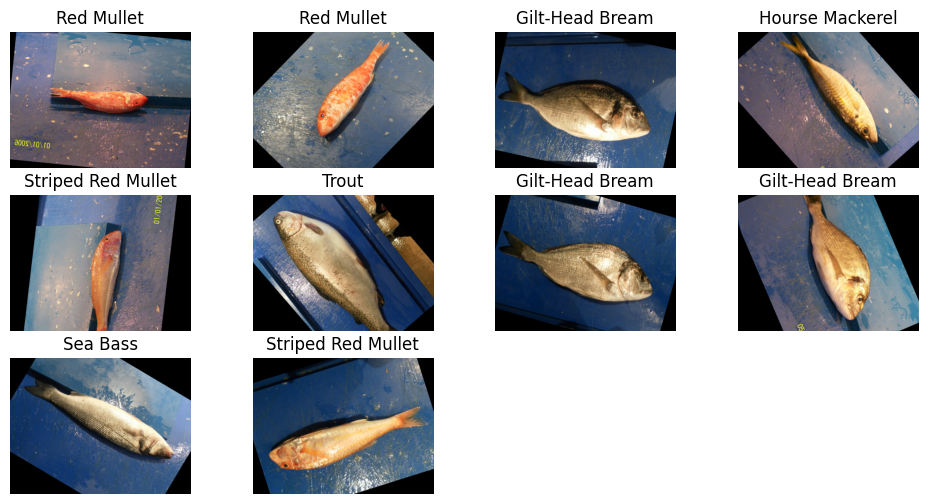

In [2]:
# # 샘플 그림
dp.get_sample_image(10, file_path, label)

In [3]:
# 라벨 인덱싱
indexed_label_arr = dp.label_indexing(label)
dp.get_label_dic()

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [4]:
# # 데이터셋 나누기
test_set, valid_set, train_set = dp.split_test_vaild_train(file_path, indexed_label_arr, 0.15)
len(test_set), len(valid_set), len(train_set)

(1403, 1403, 6475)

In [10]:
import  module.CNN as CNN

import importlib
importlib.reload(CNN)

# 상수 및 변수 셋팅
device = dp.get_device()
learning_rate = 0.001
training_epochs = 10
batch_size = 10
img_size = 256 # 이미지 사이즈 조절

model = CNN.CNN().to(device)

In [11]:
# # 배치사이즈로 나누기
test_X, test_Y = dp.make_batch_arr(test_set, batch_size)
valid_X, valid_Y = dp.make_batch_arr(valid_set, batch_size)
train_X, train_Y = dp.make_batch_arr(train_set, batch_size)

In [12]:
# # 폴더명, 라벨 정보 일치 여부 확인
print(dp.verify_dataset(test_X, test_Y))
print(dp.verify_dataset(valid_X, valid_Y))
print(dp.verify_dataset(train_X, train_Y))

True
True
True


In [13]:
# # 배치 갯수
len(train_X), len(train_Y), len(valid_X), len(valid_Y), len(test_X), len(test_Y)

(647, 647, 140, 140, 140, 140)

In [14]:
dp.run_epoch(train_X, train_Y, valid_X, valid_Y, training_epochs, device, model, learning_rate, img_size)

100%|██████████| 140/140 [00:19<00:00,  7.25it/s]


[Epoch: 1] cost = 13.0878191, valid_cost = 0.182447597


100%|██████████| 140/140 [00:18<00:00,  7.65it/s]


[Epoch: 2] cost = 0.161066547, valid_cost = 0.112398311


100%|██████████| 140/140 [00:17<00:00,  7.80it/s]


[Epoch: 3] cost = 0.0952154025, valid_cost = 0.108444594


100%|██████████| 140/140 [00:18<00:00,  7.76it/s]


[Epoch: 4] cost = 0.0883625075, valid_cost = 0.0782785416


100%|██████████| 140/140 [00:18<00:00,  7.74it/s]


[Epoch: 5] cost = 0.092099607, valid_cost = 0.19751066


100%|██████████| 140/140 [00:18<00:00,  7.65it/s]


[Epoch: 6] cost = 0.0844730288, valid_cost = 0.12692149


100%|██████████| 140/140 [00:17<00:00,  7.78it/s]


[Epoch: 7] cost = 0.0425446257, valid_cost = 0.139758155


100%|██████████| 140/140 [00:17<00:00,  7.81it/s]


[Epoch: 8] cost = 0.0831218064, valid_cost = 0.135174349


100%|██████████| 140/140 [00:19<00:00,  7.09it/s]


[Epoch: 9] cost = 0.0784109235, valid_cost = 0.131598681


100%|██████████| 140/140 [00:19<00:00,  7.35it/s]

[Epoch: 10] cost = 0.0547066592, valid_cost = 0.0958487615
